# Mhasni Khalid TP4 NLP MIAAD


---


 Natural Language Processing : Sentimental analysis

---

# Importation des bibliothèques

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=3353e329e7e303367b0de006a9b14e405deaa4e1fa414796033818477f8e1ecc
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


In [ ]:
import pandas as pd
import numpy as np
import string
#import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import joblib

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset 1 : Airlines Tweets

In [ ]:
# Lire La dataset Tweets.csv
df = pd.read_csv('/content/drive/MyDrive/NLP_datasets/TP4/Tweets.csv')
# Affichage du dataset
df


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
# Suppression des colonnes qui ne sont pas nécessaire
df.drop('tweet_id', axis=1, inplace=True)
df.drop('airline_sentiment_confidence', axis=1, inplace=True)
df.drop('negativereason', axis=1, inplace=True)
df.drop('negativereason_confidence', axis=1, inplace=True)
df.drop('airline', axis=1, inplace=True)
df.drop('airline_sentiment_gold', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('negativereason_gold', axis=1, inplace=True)
df.drop('tweet_coord', axis=1, inplace=True)
df.drop('tweet_created', axis=1, inplace=True)
df.drop('tweet_location', axis=1, inplace=True)
df.drop('user_timezone', axis=1, inplace=True)
df

,airline_sentiment,retweet_count,text
0,neutral,0,@VirginAmerica What @dhepburn said.
1,positive,0,@VirginAmerica plus you've added commercials t...
2,neutral,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,0,@VirginAmerica it's really aggressive to blast...
4,negative,0,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,positive,0,@AmericanAir thank you we got on a different f...
14636,negative,0,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,0,@AmericanAir Please bring American Airlines to...
14638,negative,0,"@AmericanAir you have my money, you change my ..."


In [ ]:
mapping = {'negative': -1, 'neutral': 0, 'positive': 1}

# remplacer les valeurs de la colonne "airline_sentiment" par les entiers équivalents
df['airline_sentiment'] = df['airline_sentiment'].replace(mapping)
df

,airline_sentiment,retweet_count,text
0,0,0,@VirginAmerica What @dhepburn said.
1,1,0,@VirginAmerica plus you've added commercials t...
2,0,0,@VirginAmerica I didn't today... Must mean I n...
3,-1,0,@VirginAmerica it's really aggressive to blast...
4,-1,0,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,1,0,@AmericanAir thank you we got on a different f...
14636,-1,0,@AmericanAir leaving over 20 minutes Late Flig...
14637,0,0,@AmericanAir Please bring American Airlines to...
14638,-1,0,"@AmericanAir you have my money, you change my ..."


In [ ]:
df['removed_punc'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['tokens'] = df['removed_punc'].apply(lambda x: nltk.word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['clean_tokens'] = df['tokens'].apply(lambda x: [token for token in x if not token.lower() in stop_words])
stemmer = PorterStemmer()
df['stem_words'] = df['clean_tokens'].apply(lambda x: ' '.join([stemmer.stem(token) for token in x]))
lemmatizer = WordNetLemmatizer()
df['lemma_words'] = df['clean_tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
df['clean_text'] = df['lemma_words'].apply(lambda x: ' '.join(x))
df['text_demojize'] = df['clean_text'].apply(lambda x: [emoji.demojize(token) for token in x])
df

,airline_sentiment,retweet_count,text,removed_punc,tokens,clean_tokens,stem_words,lemma_words,clean_text,text_demojize
0,0,0,@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said,"[VirginAmerica, What, dhepburn, said]","[VirginAmerica, dhepburn, said]",virginamerica dhepburn said,"[VirginAmerica, dhepburn, said]",VirginAmerica dhepburn said,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , d, ..."
1,1,0,@VirginAmerica plus you've added commercials t...,VirginAmerica plus youve added commercials to ...,"[VirginAmerica, plus, youve, added, commercial...","[VirginAmerica, plus, youve, added, commercial...",virginamerica plu youv ad commerci experi tacki,"[VirginAmerica, plus, youve, added, commercial...",VirginAmerica plus youve added commercial expe...,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , p, ..."
2,0,0,@VirginAmerica I didn't today... Must mean I n...,VirginAmerica I didnt today Must mean I need t...,"[VirginAmerica, I, didnt, today, Must, mean, I...","[VirginAmerica, didnt, today, Must, mean, need...",virginamerica didnt today must mean need take ...,"[VirginAmerica, didnt, today, Must, mean, need...",VirginAmerica didnt today Must mean need take ...,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , d, ..."
3,-1,0,@VirginAmerica it's really aggressive to blast...,VirginAmerica its really aggressive to blast o...,"[VirginAmerica, its, really, aggressive, to, b...","[VirginAmerica, really, aggressive, blast, obn...",virginamerica realli aggress blast obnoxi ente...,"[VirginAmerica, really, aggressive, blast, obn...",VirginAmerica really aggressive blast obnoxiou...,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , r, ..."
4,-1,0,@VirginAmerica and it's a really big bad thing...,VirginAmerica and its a really big bad thing a...,"[VirginAmerica, and, its, a, really, big, bad,...","[VirginAmerica, really, big, bad, thing]",virginamerica realli big bad thing,"[VirginAmerica, really, big, bad, thing]",VirginAmerica really big bad thing,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , r, ..."
...,...,...,...,...,...,...,...,...,...,...
14635,1,0,@AmericanAir thank you we got on a different f...,AmericanAir thank you we got on a different fl...,"[AmericanAir, thank, you, we, got, on, a, diff...","[AmericanAir, thank, got, different, flight, C...",americanair thank got differ flight chicago,"[AmericanAir, thank, got, different, flight, C...",AmericanAir thank got different flight Chicago,"[A, m, e, r, i, c, a, n, A, i, r, , t, h, a, ..."
14636,-1,0,@AmericanAir leaving over 20 minutes Late Flig...,AmericanAir leaving over 20 minutes Late Fligh...,"[AmericanAir, leaving, over, 20, minutes, Late...","[AmericanAir, leaving, 20, minutes, Late, Flig...",americanair leav 20 minut late flight warn com...,"[AmericanAir, leaving, 20, minute, Late, Fligh...",AmericanAir leaving 20 minute Late Flight warn...,"[A, m, e, r, i, c, a, n, A, i, r, , l, e, a, ..."
14637,0,0,@AmericanAir Please bring American Airlines to...,AmericanAir Please bring American Airlines to ...,"[AmericanAir, Please, bring, American, Airline...","[AmericanAir, Please, bring, American, Airline...",americanair pleas bring american airlin blackb...,"[AmericanAir, Please, bring, American, Airline...",AmericanAir Please bring American Airlines Bla...,"[A, m, e, r, i, c, a, n, A, i, r, , P, l, e, ..."
14638,-1,0,"@AmericanAir you have my money, you change my ...",AmericanAir you have my money you change my fl...,"[AmericanAir, you, have, my, money, you, chang...","[AmericanAir, money, change, flight, dont, ans...",americanair money chang flight dont answer pho...,"[AmericanAir, money, change, flight, dont, ans...",AmericanAir money change flight dont answer ph...,"[A, m, e, r, i, c, a, n, A, i, r, , m, o, n, ..."


In [ ]:
# join the strings in each list into a single string
df['text_demojize_str'] = df['text_demojize'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer()
vectorizer.fit(df['text_demojize_str'])

vectors = vectorizer.transform(df['text_demojize_str']).toarray()

df['vectorization'] = vectors.tolist()

df.drop('text_demojize_str', axis=1, inplace=True)  # drop the intermediate column
df

,airline_sentiment,retweet_count,text,removed_punc,tokens,clean_tokens,stem_words,lemma_words,clean_text,text_demojize,vectorization
0,0,0,@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said,"[VirginAmerica, What, dhepburn, said]","[VirginAmerica, dhepburn, said]",virginamerica dhepburn said,"[VirginAmerica, dhepburn, said]",VirginAmerica dhepburn said,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , d, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,0,@VirginAmerica plus you've added commercials t...,VirginAmerica plus youve added commercials to ...,"[VirginAmerica, plus, youve, added, commercial...","[VirginAmerica, plus, youve, added, commercial...",virginamerica plu youv ad commerci experi tacki,"[VirginAmerica, plus, youve, added, commercial...",VirginAmerica plus youve added commercial expe...,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , p, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,0,@VirginAmerica I didn't today... Must mean I n...,VirginAmerica I didnt today Must mean I need t...,"[VirginAmerica, I, didnt, today, Must, mean, I...","[VirginAmerica, didnt, today, Must, mean, need...",virginamerica didnt today must mean need take ...,"[VirginAmerica, didnt, today, Must, mean, need...",VirginAmerica didnt today Must mean need take ...,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , d, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,-1,0,@VirginAmerica it's really aggressive to blast...,VirginAmerica its really aggressive to blast o...,"[VirginAmerica, its, really, aggressive, to, b...","[VirginAmerica, really, aggressive, blast, obn...",virginamerica realli aggress blast obnoxi ente...,"[VirginAmerica, really, aggressive, blast, obn...",VirginAmerica really aggressive blast obnoxiou...,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , r, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,-1,0,@VirginAmerica and it's a really big bad thing...,VirginAmerica and its a really big bad thing a...,"[VirginAmerica, and, its, a, really, big, bad,...","[VirginAmerica, really, big, bad, thing]",virginamerica realli big bad thing,"[VirginAmerica, really, big, bad, thing]",VirginAmerica really big bad thing,"[V, i, r, g, i, n, A, m, e, r, i, c, a, , r, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
14635,1,0,@AmericanAir thank you we got on a different f...,AmericanAir thank you we got on a different fl...,"[AmericanAir, thank, you, we, got, on, a, diff...","[AmericanAir, thank, got, different, flight, C...",americanair thank got differ flight chicago,"[AmericanAir, thank, got, different, flight, C...",AmericanAir thank got different flight Chicago,"[A, m, e, r, i, c, a, n, A, i, r, , t, h, a, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14636,-1,0,@AmericanAir leaving over 20 minutes Late Flig...,AmericanAir leaving over 20 minutes Late Fligh...,"[AmericanAir, leaving, over, 20, minutes, Late...","[AmericanAir, leaving, 20, minutes, Late, Flig...",americanair leav 20 minut late flight warn com...,"[AmericanAir, leaving, 20, minute, Late, Fligh...",AmericanAir leaving 20 minute Late Flight warn...,"[A, m, e, r, i, c, a, n, A, i, r, , l, e, a, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14637,0,0,@AmericanAir Please bring American Airlines to...,AmericanAir Please bring American Airlines to ...,"[AmericanAir, Please, bring, American, Airline...","[AmericanAir, Please, bring, American, Airline...",americanair pleas bring american airlin blackb...,"[AmericanAir, Please, bring, American, Airline...",AmericanAir Please bring American Airlines Bla...,"[A, m, e, r, i, c, a, n, A, i, r, , P, l, e, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14638,-1,0,"@AmericanAir you have my money, you change my ...",AmericanAir you have my money you change my fl...,"[AmericanAir, you, have, my, money, you, chang...","[AmericanAir, money, change, flight, dont, ans...",americanair money chang flight dont answer pho...

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
# Fit the model using the 2D arrays
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7793715846994536


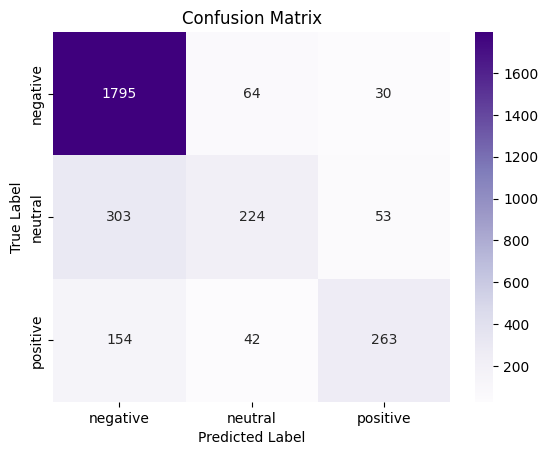

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the classes of your data
classes = ['negative', 'neutral', 'positive']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=classes, yticklabels=classes)

# Set the title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Display the plot
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.80      0.95      0.87      1889
           0       0.68      0.39      0.49       580
           1       0.76      0.57      0.65       459

    accuracy                           0.78      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.77      0.78      0.76      2928



In [ ]:
joblib.dump((model, vectorizer), 'pickeled_airline.pkl')

['pickeled_airline.pkl']

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

model, vectorizer = joblib.load('pickeled_airline.pkl')

test_data = ["My experience wasn't so well.", "Staff was rude.","Lovely flights i had,thank you","I love it"]

test_features = vectorizer.transform(test_data)

predicted_labels = model.predict(test_features)

print(predicted_labels)

[-1 -1  1  1]


# Dataset 2 : IMDB reviews

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/NLP_datasets/TP4/IMDB Dataset.csv"
df= pd.read_csv(path)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
mapping = {'negative': -1, 'positive': 1}
df['sentiment'] = df['sentiment'].replace(mapping)

# Randomly select 35% of the data
df = df.sample(frac=0.35, random_state=42)

# Split the data into half negative and half positive sentiment
half_df_neg = df[df['sentiment'] == -1].sample(frac=0.5, random_state=42)
half_df_pos = df[df['sentiment'] == 1].sample(frac=0.5, random_state=42)

# Concatenate the two halves into a new DataFrame
half_df = pd.concat([half_df_neg, half_df_pos], ignore_index=True)

half_df

,review,sentiment
0,Uwe Boll slips back in his film-making skills ...,-1
1,Poor Whoopi Goldberg. Imagine her at a friend'...,-1
2,Was this the greatest movie that I have ever s...,-1
3,This very forced attempt to fuse Robert Altman...,-1
4,Honestly - this short film sucks. the dummy us...,-1
...,...,...
8745,"First of all, I must say that I love this film...",1
8746,As a kid I remember being nine or ten and lovi...,1
8747,There are other reviews here so I don't need t...,1
8748,Nightbreed is definitely my most favorite movi...,1


In [ ]:
# Remove punctuation
half_df['removed_punc'] = half_df['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenize
half_df['tokens'] = half_df['removed_punc'].apply(lambda x: nltk.word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
half_df['clean_tokens'] = half_df['tokens'].apply(lambda x: [token for token in x if not token.lower() in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
half_df['lemma_words'] = half_df['clean_tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

# Join lemmatized words to form clean text
half_df['clean_text'] = half_df['lemma_words'].apply(lambda x: ' '.join(x))

In [ ]:
half_df

,review,sentiment,removed_punc,tokens,clean_tokens,lemma_words,clean_text
0,Uwe Boll slips back in his film-making skills ...,-1,Uwe Boll slips back in his filmmaking skills o...,"[Uwe, Boll, slips, back, in, his, filmmaking, ...","[Uwe, Boll, slips, back, filmmaking, skills, o...","[Uwe, Boll, slip, back, filmmaking, skill, off...",Uwe Boll slip back filmmaking skill offer scif...
1,Poor Whoopi Goldberg. Imagine her at a friend'...,-1,Poor Whoopi Goldberg Imagine her at a friends ...,"[Poor, Whoopi, Goldberg, Imagine, her, at, a, ...","[Poor, Whoopi, Goldberg, Imagine, friends, din...","[Poor, Whoopi, Goldberg, Imagine, friend, dinn...",Poor Whoopi Goldberg Imagine friend dinner par...
2,Was this the greatest movie that I have ever s...,-1,Was this the greatest movie that I have ever s...,"[Was, this, the, greatest, movie, that, I, hav...","[greatest, movie, ever, seen, worst, Nobr, br,...","[greatest, movie, ever, seen, worst, Nobr, br,...",greatest movie ever seen worst Nobr br mother ...
3,This very forced attempt to fuse Robert Altman...,-1,This very forced attempt to fuse Robert Altman...,"[This, very, forced, attempt, to, fuse, Robert...","[forced, attempt, fuse, Robert, Altman, Quenti...","[forced, attempt, fuse, Robert, Altman, Quenti...",forced attempt fuse Robert Altman Quentin Tara...
4,Honestly - this short film sucks. the dummy us...,-1,Honestly this short film sucks the dummy used...,"[Honestly, this, short, film, sucks, the, dumm...","[Honestly, short, film, sucks, dummy, used, ne...","[Honestly, short, film, suck, dummy, used, nec...",Honestly short film suck dummy used necro scen...
...,...,...,...,...,...,...,...
8745,"First of all, I must say that I love this film...",1,First of all I must say that I love this filmb...,"[First, of, all, I, must, say, that, I, love, ...","[First, must, say, love, filmbr, br, first, fi...","[First, must, say, love, filmbr, br, first, fi...",First must say love filmbr br first film saw d...
8746,As a kid I remember being nine or ten and lovi...,1,As a kid I remember being nine or ten and lovi...,"[As, a, kid, I, remember, being, nine, or, ten...","[kid, remember, nine, ten, loving, movie, roun...","[kid, remember, nine, ten, loving, movie, roun...",kid remember nine ten loving movie round Bolly...
8747,There are other reviews here so I don't need t...,1,There are other reviews here so I dont need to...,"[There, are, other, reviews, here, so, I, dont...","[reviews, dont, need, say, great, aboutMy, poi...","[review, dont, need, say, great, aboutMy, poin...",review dont need say great aboutMy point heard...
8748,Nightbreed is definitely my most favorite movi...,1,Nightbreed is definitely my most favorite movi...,"[Nightbreed, is, definitely, my, most, favorit...","[Nightbreed, definitely, favorite, movie, Ive,...","[Nightbreed, definitely, favorite, movie, Ive,...",Nightbreed definitely favorite movie Ive worn ...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(half_df['clean_text']).toarray()
y = half_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Fit the model using the 2D arrays
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

svc = LinearSVC(max_iter=1000)
svc.fit(X_train, y_train)

# Evaluate the performance of the models on the testing data
nb_pred = model.predict(X_test)
lr_pred = lr.predict(X_test)
svc_pred = svc.predict(X_test)

print('Naive Bayes accuracy:', accuracy_score(y_test, nb_pred))
print('Logistic Regression accuracy:', accuracy_score(y_test, lr_pred))
print('Linear SVC accuracy:', accuracy_score(y_test, svc_pred))

# Use the best-performing model to predict the number of positive and negative reviews in the entire dataset
best_model = svc
half_df['predicted_sentiment'] = best_model.predict(X)
num_positive = (half_df['predicted_sentiment'] == 1).sum()
num_negative = (half_df['predicted_sentiment'] == -1).sum()

print('Number of positive reviews:', num_positive)
print('Number of negative reviews:', num_negative)

Naive Bayes accuracy: 0.8394285714285714
Logistic Regression accuracy: 0.86
Linear SVC accuracy: 0.8577142857142858
Number of positive reviews: 4418
Number of negative reviews: 4332


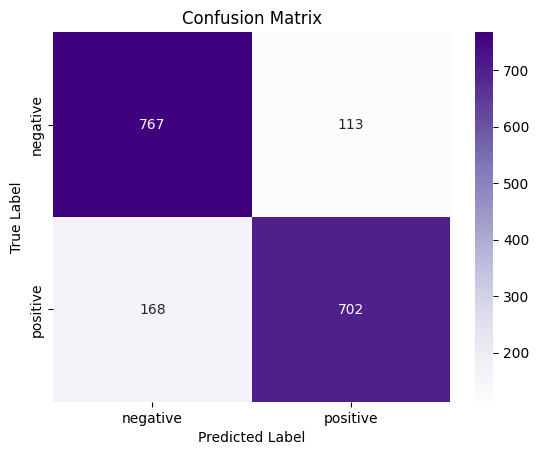

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the classes of your data
classes = ['negative', 'positive']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=classes, yticklabels=classes)

# Set the title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Display the plot
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.82      0.87      0.85       880
           1       0.86      0.81      0.83       870

    accuracy                           0.84      1750
   macro avg       0.84      0.84      0.84      1750
weighted avg       0.84      0.84      0.84      1750



In [ ]:
joblib.dump((model, vectorizer), 'pickeled_IMDB.pkl')

['pickeled_IMDB.pkl']

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

model, vectorizer = joblib.load('pickeled_IMDB.pkl')

test_data = ["The Godfather is a masterpiece.", "Interstellar is the best movie of all times, it's so good.","I hate it, worst show that has ever been broadcasted on TV"]

test_features = vectorizer.transform(test_data)

predicted_labels = model.predict(test_features)

print(predicted_labels)

[ 1  1 -1]


Un autre test, pour montere l'ambiguité du modèle et de l'algorithme

In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

model, vectorizer = joblib.load('pickeled_IMDB.pkl')

test_data = ["The Worst Evil is a masterpiece", 
             "Wonderful isn't that good of a movie", 
             "The terrible is the best show that has ever been broadcasted on TV"]

# Remove punctuation
test_data = [s.translate(str.maketrans('', '', string.punctuation)) for s in test_data]

# Tokenize
test_data = [nltk.word_tokenize(s) for s in test_data]

# Remove stopwords
stop_words = set(stopwords.words('english'))
test_data = [[token for token in s if not token.lower() in stop_words] for s in test_data]

# Lemmatization
lemmatizer = WordNetLemmatizer()
test_data = [[lemmatizer.lemmatize(w) for w in s] for s in test_data]

# Join lemmatized words to form clean text
test_data = [' '.join(s) for s in test_data]

print(test_data)


test_features = vectorizer.transform(test_data)

predicted_labels = model.predict(test_features)

print(predicted_labels)

['Worst Evil masterpiece', 'Wonderful isnt good movie', 'terrible best show ever broadcasted TV']
[-1  1 -1]


## trying NER to solve the error

In [ ]:
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


dataset = [("Worst Evil masterpiece", {"entities": [(0, 10, "MOVIE")]}),
           ("Wonderful isnt good movie", {"entities": [(0, 9, "MOVIE")]}),
           ("The terrible best show ever broadcasted TV", {"entities": [(0, 8, "SERIES")]}),
          ]

# Remove punctuation
clean_dataset = [s[0].translate(str.maketrans('', '', string.punctuation)) for s in dataset]

# Tokenize
clean_dataset = [nltk.word_tokenize(s) for s in clean_dataset]

# Remove stopwords
stop_words = set(stopwords.words('english'))
clean_dataset = [[token for token in s if not token.lower() in stop_words] for s in clean_dataset]

# Lemmatization
lemmatizer = WordNetLemmatizer()
clean_dataset = [[lemmatizer.lemmatize(w) for w in s] for s in clean_dataset]

# Join lemmatized words to form clean text
clean_dataset = [' '.join(s) for s in clean_dataset]

print(clean_dataset)



['Worst Evil masterpiece', 'Wonderful isnt good movie', 'terrible best show ever broadcasted TV']


In [ ]:
# define the vectorizer
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))

# fit the vectorizer on the training data
train_data = [data[0] for data in dataset]
vectorizer.fit(train_data)

# transform the training data into features
train_features = vectorizer.transform(train_data)

# extract the labels from the dataset
train_labels = [data[1]["entities"][0][2] for data in dataset]

# define and train the model
model = LinearSVC()
model.fit(train_features, train_labels)

print(test_data)

# extract the entities from the test data and print the predicted labels and movie/series name
for i, text in enumerate(test_data):
    # extract the movie/series name entity from the ground truth
    entity_start = dataset[i][1]["entities"][0][0]
    entity_end = dataset[i][1]["entities"][0][1]
    entity_name = text[entity_start:entity_end]
    
    # extract features from the test data
    test_features = vectorizer.transform([text])

    # predict the entity type using the trained model
    predicted_labels = model.predict(test_features)
    entity_type = predicted_labels[0]

    print(f"Detected entity type: {entity_type}, Entity name: {entity_name}")

    for entity in text:
        text = text.replace(entity_name, '')
    # update the test data
    test_data[i] = text

print(test_data)



['Worst Evil masterpiece', 'Wonderful isnt good movie', 'terrible best show ever broadcasted TV']
Detected entity type: MOVIE, Entity name: Worst Evil
Detected entity type: MOVIE, Entity name: Wonderful
Detected entity type: SERIES, Entity name: terrible
[' masterpiece', ' isnt good movie', ' best show ever broadcasted TV']


In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

model, vectorizer = joblib.load('pickeled_IMDB.pkl')

print(test_data)

test_features = vectorizer.transform(test_data)

predicted_labels = model.predict(test_features)

print(predicted_labels)

[' masterpiece', ' isnt good movie', ' best show ever broadcasted TV']
[ 1 -1  1]
